Team leader: Jiaqin Kang<br>
Student ID: 33656491<br>
Team member : Aromal Shiney<br>
student id: 33659221<br>

<h1>Hypotheses</h1>

The following hypotheses were made:<br>
That the outputs can be predicted from the inputs<br>
The available data is sufficiently informative to learn the relationship between inputs and outputs.<br>

<h1>Methodology</h1>


<h1>Content</h1>
<li>X0:  Category of the building 
<li>X1: Relative Compactness
<li>X2: Surface Area
<li>X3: Wall Area
<li>X4: Roof Area
<li>X5: Overall Height
<li>X6: Orientation
<li>X7: Glazing Area
<li>X8: Glazing Area Distribution
<li>Y: Heating Load

In [169]:
# load the dataset
import pandas as pd
df = pd.read_csv('datcw_na.csv')
# check the df
df.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,Y
0,C3,1.19,622.55,NaN,89.31,7.00,1.98,0.0,0.0,15.55
1,C1,1.19,622.55,323.40,109.15,7.70,3.00,0.0,0.0,15.55
2,C1,0.88,463.05,291.06,99.23,5.67,4.40,0.0,0.0,15.55
3,C2,0.79,509.36,291.06,121.28,6.30,4.05,0.0,0.0,15.55
4,C1,0.89,507.15,385.39,121.28,7.70,2.00,0.0,0.0,20.84


In [170]:
# check the shape of the df
df.shape

(768, 10)

<h1>Data pre-processing and data cleaning</h1>

In [171]:
# check for NaN values
df.isnull().sum()

X0     0
X1     0
X2     0
X3    40
X4     0
X5     0
X6     0
X7     0
X8     0
Y      0
dtype: int64

C:\Users\admin\AppData\Local\Temp\ipykernel_19504\665299678.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), vmin=-1,vmax=1, cmap='coolwarm', annot=True, linewidths=0.5, linecolor='black', fmt='.2f')


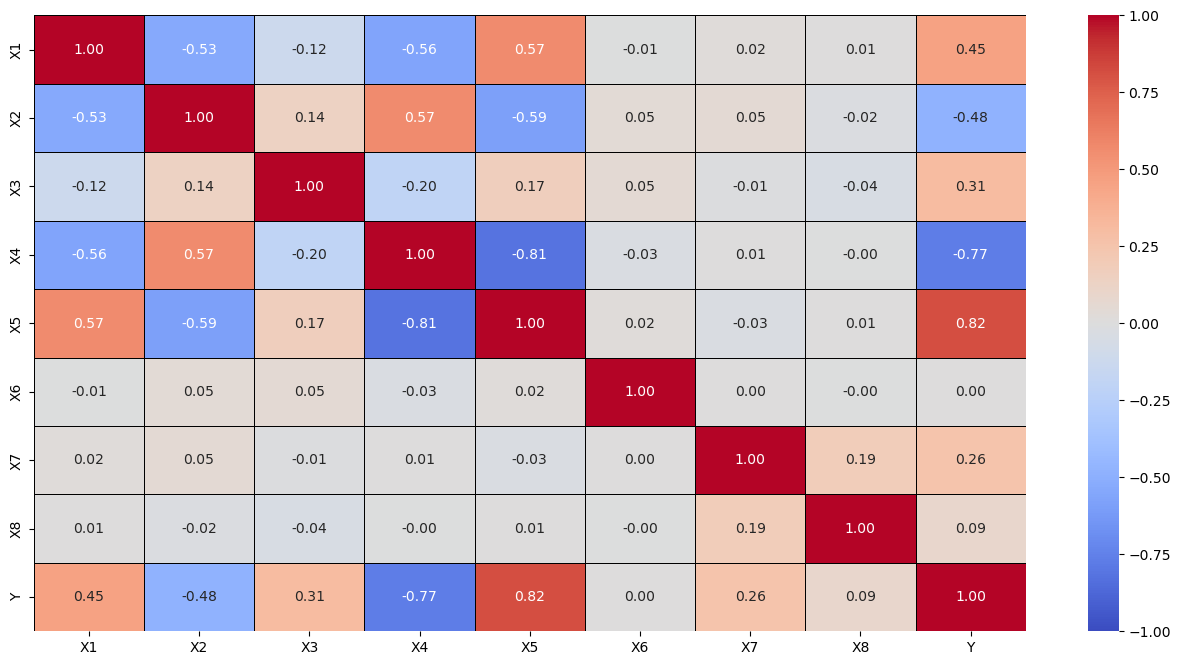

In [172]:
# check for data correlations using heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), vmin=-1,vmax=1, cmap='coolwarm', annot=True, linewidths=0.5, linecolor='black', fmt='.2f')
plt.show()

<AxesSubplot:>

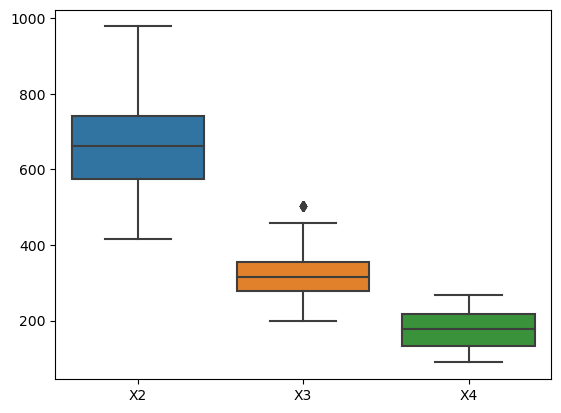

In [173]:
# box plot selected the features
areaFeatures = ['X2','X3','X4']
sns.boxplot(data = df[areaFeatures])


In [174]:
# calculate std, mean and others
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y
count,768.000000,768.000000,728.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.763516,666.768997,321.102527,176.564141,5.229766,3.527331,0.237852,2.803737,22.307201
std,0.147093,120.863329,60.479340,51.280618,1.844813,1.245710,0.139736,1.597817,10.090196
min,0.500000,416.740000,198.450000,89.310000,2.840000,1.620000,0.000000,0.000000,6.010000
25%,0.650000,575.510000,277.830000,132.300000,3.470000,2.427500,0.100000,1.517500,12.992500
50%,0.750000,661.500000,315.320000,178.235000,4.955000,3.600000,0.240000,2.970000,18.950000
75%,0.860000,741.130000,355.740000,218.300000,6.930000,4.425000,0.360000,3.960000,31.667500
max,1.190000,978.290000,503.970000,266.800000,8.470000,6.050000,0.480000,6.050000,43.100000


The above isnull function is used to check if there are any null values in the dataset. This is done to ensure that the dataset is clean as if there are null values, it will affect the model performance. "garbage in bargabe out".
The result shows that only on the column "X3"/"Wall Area" contains null values. There are serval ways to deal with null values like dropping the rows with null values, replacing the null values with mean or median values of the column. In this case, consider the ratio of missing counts "40" to the total number of rows "768" and the importance correlation between other columns. The best solution is to replace the null values with the mean value of this column "X3"/"Wall Area".

In [175]:
# calculate the mean of X3
X3_mean = df['X3'].mean()
# replace NaN values in "X3" with the X3_mean
df['X3'].fillna(X3_mean, inplace=True)

In [176]:
# check for NaN values again to verify the changes
df.isnull().sum()

X0    0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y     0
dtype: int64

In [177]:
# check X0 column group values count
df['X0'].value_counts()

C2    265
C3    260
C1    243
Name: X0, dtype: int64

<h3> Label Encoding </h3>

In [178]:
from sklearn import preprocessing as prep
labelEncoder = prep.LabelEncoder()
df['X0'] = labelEncoder.fit_transform(df['X0'])
df.head()


,X0,X1,X2,X3,X4,X5,X6,X7,X8,Y
0,2,1.19,622.55,321.102527,89.31,7.00,1.98,0.0,0.0,15.55
1,0,1.19,622.55,323.400000,109.15,7.70,3.00,0.0,0.0,15.55
2,0,0.88,463.05,291.060000,99.23,5.67,4.40,0.0,0.0,15.55
3,1,0.79,509.36,291.060000,121.28,6.30,4.05,0.0,0.0,15.55
4,0,0.89,507.15,385.390000,121.28,7.70,2.00,0.0,0.0,20.84


In [179]:
# split to x and y
x = df.drop('Y', axis=1)
y = df['Y']
print(x.shape)
print(y.shape)

(768, 9)
(768,)


In [180]:
# reshape y to 2 dimensions
y = y.values.reshape(-1,1)

In [181]:
# scale the data with standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

<h1>Splitting data</h1>
<li>Training data: 70%
<li>Test data: 30%

In [182]:
# split data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
print( x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(537, 9)
(231, 9)
(537, 1)
(231, 1)


<h3> Simple Linear Regression Model </h3>

In [183]:
# import the libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [184]:
#create a baseline model with linear regression
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)



LinearRegression()

In [185]:
train_data_prediciton = lin_reg_model.predict(x_train)

In [186]:
# R squared error
train_error_score = metrics.r2_score(y_train, train_data_prediciton)

In [187]:
# prediction on the training data
test_data_prediction = lin_reg_model.predict(x_test)

In [188]:
#calculate the mean squared error
test_error_score1 = metrics.r2_score(y_test, test_data_prediction)
print("the mean squeared error is: ", test_error_score1)

the mean squeared error is:  0.7628517921653891


In [189]:
# R squared error
test_error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error - Test: ", test_error_score)

R squared error - Test:  0.7628517921653891


<AxesSubplot:>

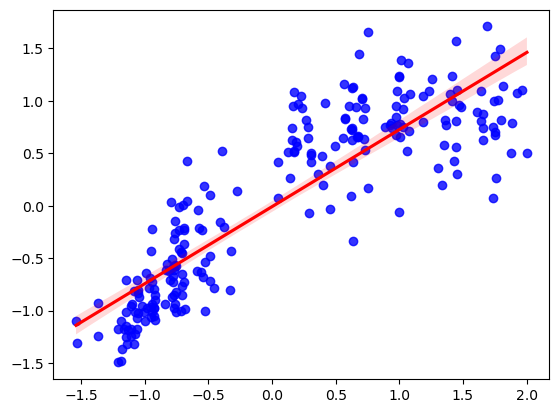

In [190]:
# create a scatterplot with regression line with seaborn
import seaborn as sns
sns.regplot(x=y_test, y=test_data_prediction,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

<h1>The SVD method for linear regression  </h1>

In [191]:
# import libary for linear regression
from sklearn.linear_model import LinearRegression

In [192]:
LinearRegressor = LinearRegression()

Fit linear model

In [193]:
LinearRegressor.fit(x_train, y_train)

LinearRegression()

Return the coefficient of determination of the prediction

In [194]:
LinearRegressor.score(x_train, y_train)

0.8191709914950169

In [195]:
# Display the intercept and coeficients of the feature(s) in the model computed with the SVD method by sklearn
LinearRegressor.intercept_, LinearRegressor.coef_

(array([-0.00980619]),
 array([[ 0.02565046, -0.03326385, -0.05427531,  0.16229416, -0.28144384,
          0.54393267, -0.01669471,  0.26693488,  0.04636194]]))

In [196]:
LinearRegressor.predict(x_test)

array([[-1.06474823],
       [ 0.53094758],
       [ 1.00069314],
       [ 0.89084464],
       [ 1.09410465],
       [-0.53944164],
       [-0.855906  ],
       [ 0.72895182],
       [-0.31621536],
       [-0.06623789],
       [-0.01177705],
       [ 1.06508915],
       [ 0.81919881],
       [-0.44364749],
       [-0.978312  ],
       [ 0.74243779],
       [-0.33729809],
       [-0.2080212 ],
       [-0.5561468 ],
       [-0.06104952],
       [ 0.64319011],
       [-1.18009604],
       [ 0.6303015 ],
       [-0.20347899],
       [-0.93311279],
       [ 1.04872962],
       [-0.23250578],
       [-1.09479716],
       [ 0.50764454],
       [-0.22366119],
       [ 0.92169284],
       [ 0.94276088],
       [-1.31499401],
       [ 0.03442219],
       [ 0.19412775],
       [ 1.07828778],
       [-0.78396918],
       [-0.80131938],
       [ 0.74660174],
       [-0.85026003],
       [ 1.06623128],
       [-0.81587963],
       [-0.92568055],
       [-0.36229166],
       [-0.93856225],
       [-0

<h3> Ridge Regression Model </h3>
<p> After building the base model It is time to tune the hyperparameters and find the best model by checking their performance in the validation set. 

In [197]:
#import libraries required for ridge regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [198]:
ridge_model = Ridge()

In [199]:
# make hyperparameters for grid search
# Define the hyperparameter grid to search
hyperparameters = {
    'ridge__alpha': [0.1, 1.0, 10.0, 100.0],
    'ridge__fit_intercept': [True, False]
}

In [200]:
# create a pipeline to standardize the features
# pipe = Pipeline([('scaler', StandardScaler()), ('Ridge', ridge_model)])

# Define the pipeline to standardize the features
pipeline = Pipeline([
    ('standardize', StandardScaler()),
    ('ridge', ridge_model)
])


In [201]:
# Define the grid search
grid_search = GridSearchCV(
    pipeline,
    hyperparameters,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

In [202]:
#fit the grid_search to the training set
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardize', StandardScaler()),
                                       ('ridge', Ridge())]),
             n_jobs=-1,
             param_grid={'ridge__alpha': [0.1, 1.0, 10.0, 100.0],
                         'ridge__fit_intercept': [True, False]},
             scoring='r2')

In [203]:
# print the best parameters
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_index_)

{'ridge__alpha': 10.0, 'ridge__fit_intercept': True}
0.8123728749154994
Pipeline(steps=[('standardize', StandardScaler()),
                ('ridge', Ridge(alpha=10.0))])
4


In [204]:
# create the model with the best parameters
ridge_model_best = Ridge(alpha=10.0, fit_intercept=True)

In [205]:
# train the model
ridge_history = ridge_model_best.fit(x_train, y_train)

In [206]:
# predict the test data
ridge_test_pred = ridge_model_best.predict(x_test)

In [207]:
# score the model
ridge_test_score = ridge_model_best.score(x_train, y_train)
print(ridge_test_score)

0.8189641060804927


//////////////////////////////////////////////////////////////////////////////////////////////////////////<br>

summary, coing to test on the test data and see the performance of the model

//comment on the table based on the fine tuned model

<h1>Lasso RegressionModel</h1>

In [208]:
from sklearn import linear_model

In [209]:
Lasso = linear_model.Lasso(alpha=0.1)

In [210]:
Lasso.fit(x_train, y_train)

Lasso(alpha=0.1)

In [211]:
Lasso.get_params()

{'alpha': 0.1,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [212]:
# predict the test data
lasso_test_pred = Lasso.predict(x_test)

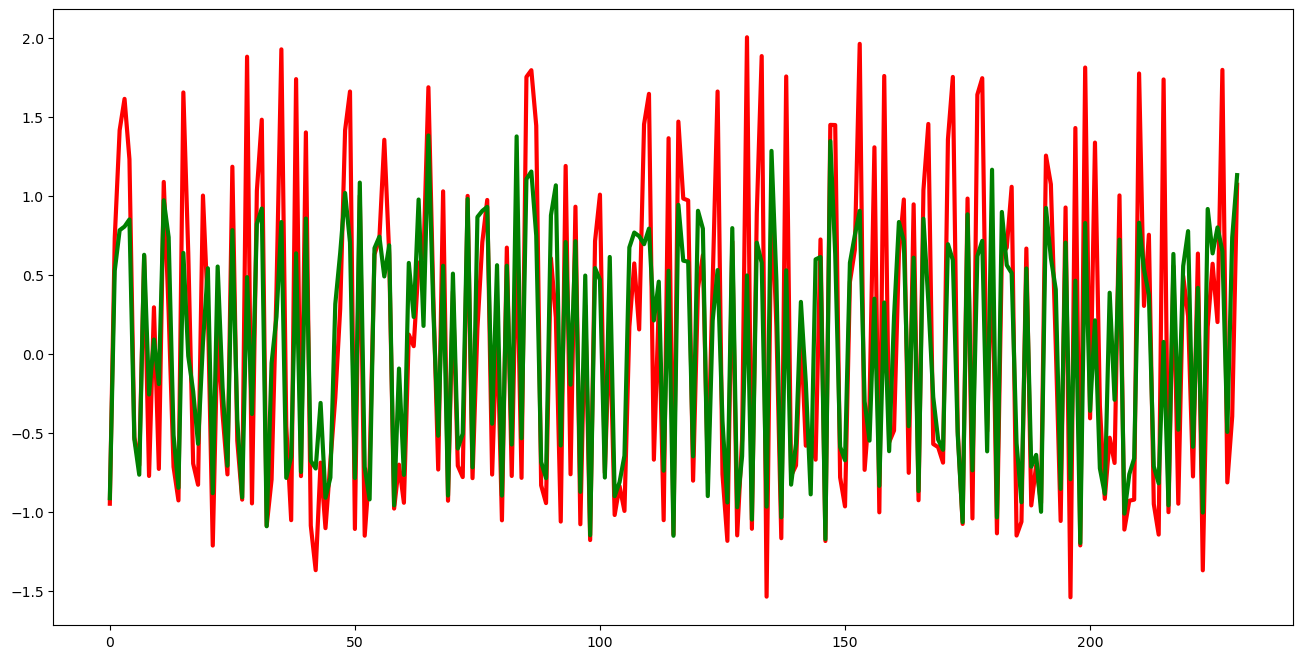

In [213]:
# plot the predicted values against the actual values in red and blue
plt.figure(figsize=(16,8))
plt.plot(y_test,color='red',linewidth=3)
plt.plot(lasso_test_pred,color='green',linewidth=3)
plt.show()

<h1>Elastic Net Regression</h1>

In [214]:
from sklearn.linear_model import ElasticNet

In [215]:
ENR = ElasticNet(random_state=0)

In [216]:
ENR.fit(x_train, y_train)

ElasticNet(random_state=0)

In [217]:
ENR.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': 0,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [218]:
print(ENR.coef_)

[ 0.          0.         -0.          0.         -0.11217634  0.1497326
 -0.          0.          0.        ]


In [219]:
print(ENR.intercept_)

[-0.02991198]


In [220]:
# predict the test data
ENR_test_pred = ENR.predict(x_test)

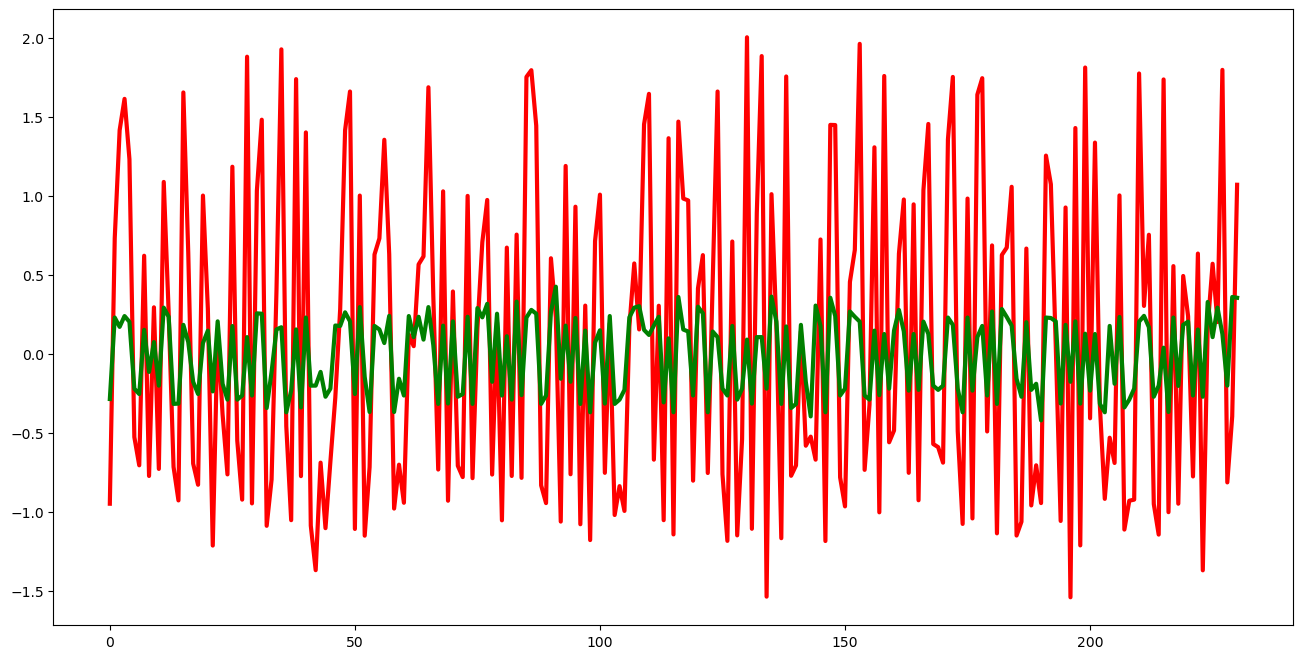

In [221]:
# plot the predicted values against the actual values in red and blue
plt.figure(figsize=(16,8))
plt.plot(y_test,color='red',linewidth=3)
plt.plot(ENR_test_pred,color='green',linewidth=3)
plt.show()

<h1>Polynomial Regression with regularisation</h1>

In [222]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [223]:
degree = 2

In [224]:
poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())

In [225]:
poly.fit(x_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [226]:
poly.get_params()

{'memory': None,
 'steps': [('polynomialfeatures', PolynomialFeatures()),
  ('linearregression', LinearRegression())],
 'verbose': False,
 'polynomialfeatures': PolynomialFeatures(),
 'linearregression': LinearRegression(),
 'polynomialfeatures__degree': 2,
 'polynomialfeatures__include_bias': True,
 'polynomialfeatures__interaction_only': False,
 'polynomialfeatures__order': 'C',
 'linearregression__copy_X': True,
 'linearregression__fit_intercept': True,
 'linearregression__n_jobs': None,
 'linearregression__normalize': 'deprecated',
 'linearregression__positive': False}

In [227]:
# predict the test data
poly_test_pred = poly.predict(x_test)

In [228]:
# score the model
poly_test_score = poly.score(x_train, y_train)
print(poly_test_score)

0.8659510747598101


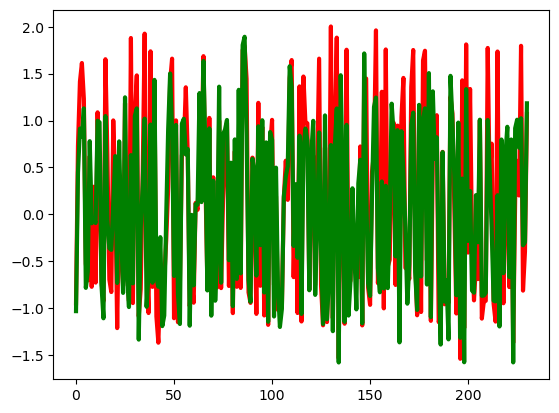

In [229]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(y_test, color='red', linewidth=3)
plt.plot(poly_test_pred, color='green', linewidth=3)
plt.show()

<h1>Neural Network Model</h1>

In [230]:
from sklearn.neural_network import MLPRegressor

In [231]:
mlp = MLPRegressor(hidden_layer_sizes=(100,100,100), max_iter=1000)

In [232]:
mlp.fit(x_train, y_train)

c:\Users\admin\Anaconda3\envs\ai\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(hidden_layer_sizes=(100, 100, 100), max_iter=1000)

In [233]:
# predict the test data
mlp.predict(x_test)

array([-0.97555942,  0.32401081,  0.93622338,  0.58959912,  1.22700912,
       -0.83127381, -0.68107696,  0.86470428, -0.59440538, -0.16026706,
       -0.42547214,  1.19459796,  1.03973405, -0.84843051, -0.95632129,
        1.98706763, -0.08826943, -0.6053011 , -0.72363347,  0.36279277,
        1.02335005, -1.14961158,  0.88657012, -0.35772548, -0.60929048,
        1.41883   , -0.54594891, -0.99438895,  0.70394293, -0.90810117,
        0.65870476,  1.23538328, -0.99876047, -0.33924315,  0.63547782,
        1.49723409, -0.79105871, -0.86307904,  1.36477811, -0.98509416,
        1.40819414, -0.80128066, -1.42062503, -0.58449962, -1.07516621,
       -1.12423181, -0.11388364,  0.60293143,  2.13402911,  0.65641296,
       -1.14780653,  0.56213602, -0.91063187, -0.81165742,  1.04969538,
        0.76968235,  0.561192  ,  0.70760951, -1.0496846 , -0.35386409,
       -0.84130819,  0.14399455,  0.50270855,  1.34518864, -0.20838117,
        0.93504822,  0.44231831, -0.84735399,  1.07087395, -0.86

In [234]:
# score the model
mlp_score = mlp.score(x_test, y_test)
print(mlp_score)

0.800743857445189


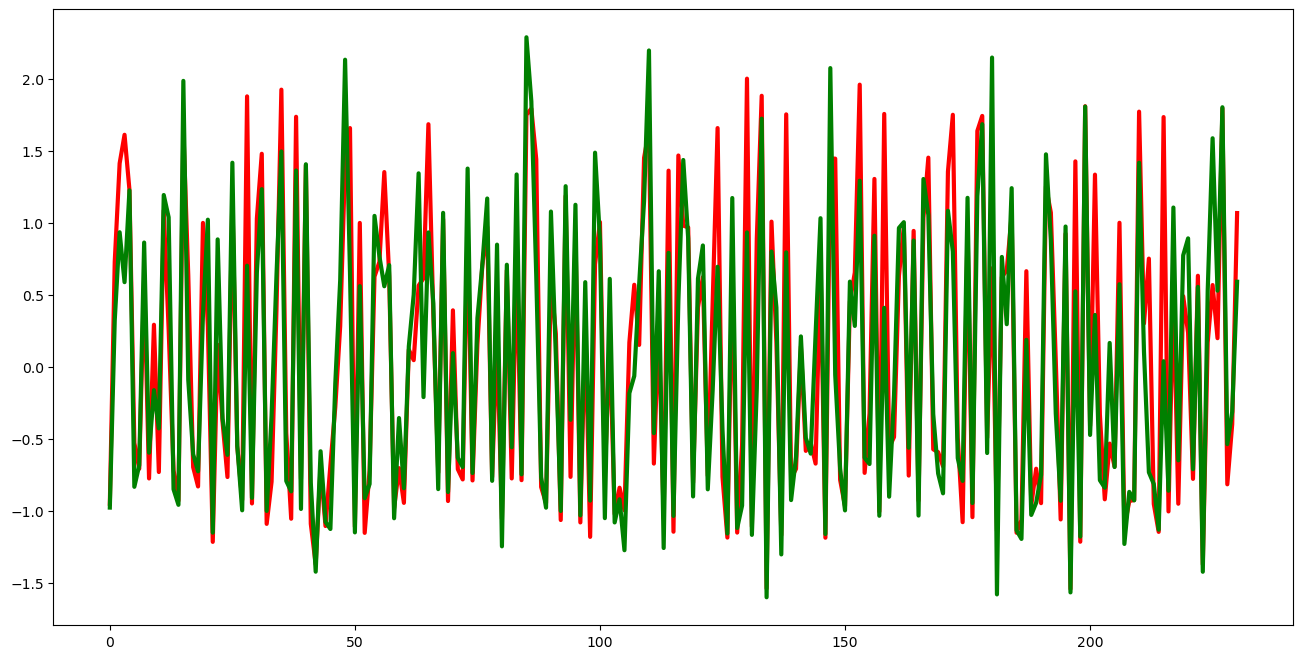

In [235]:
# plot the predicted values against the actual values in red and blue
plt.figure(figsize=(16,8))
plt.plot(y_test,color='red',linewidth=3)
plt.plot(mlp.predict(x_test),color='green',linewidth=3)
plt.show()